In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.utils import shuffle

In [37]:
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model history")
    plt.ylabel("value")
    plt.xlabel("epoch")
    plt.legend(["train", "val", "train loss", "val loss"], loc="upper left")
    plt.show()


In [38]:
test_size = 100
x_train, y_train = np.load("x_train50x50.npz")['arr_0'], np.load("y_train50x50.npz")['arr_0']
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = x_train[-test_size:], y_train[-test_size:]
x_train, y_train = x_train[:-test_size], y_train[:-test_size]
x_train = x_train
x_test = x_test
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1000, 50, 50, 3), (1000, 11), (100, 50, 50, 3), (100, 11))

In [39]:
classifications = ['cpp_go_left', 'cpp_go_right', 'cpp_notgo', 'cpp_onlygo', 'cpp_onlyleft', 'cpp_onlyright', 'cpp_stop_line', 'cpp_stop_pic', 'notleft_sign', 'notright_pic', 'notstop_pic']
len(classifications)

11

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.10/site-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.10/site-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


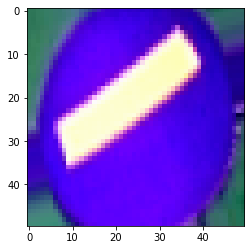

cpp_notgo


In [40]:
datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    featurewise_center=True,
    featurewise_std_normalization=True,
    channel_shift_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
)

data = datagen.flow(x_train, y_train, batch_size=64)

n = 2
plt.imshow(data[n][0][0])
plt.show()
print(classifications[np.where(data[n][1][0]==1)[0][0]])

In [41]:
model = None
model = Sequential([
    layers.Input(shape=(50, 50, 3)),
    # layers.BatchNormalization(),
    
    layers.Conv2D(64, kernel_size=(2, 2), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(500, activation='sigmoid'),
    layers.Dense(200, activation='sigmoid'),
    layers.Dense(len(classifications), activation='softmax'),
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 50, 64)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 32)        8224      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_9 (Dense)             (None, 500)              

/var/folders/tz/3mdp4k9x3k94jf1r3s37rps80000gn/T/ipykernel_2669/2942871359.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(data,  epochs=15, verbose=1,


Epoch 1/15


2022-08-15 17:18:31.678267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 0.3710 - accuracy: 0.0970

2022-08-15 17:18:34.563812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 114ms/step - loss: 0.3710 - accuracy: 0.0970 - val_loss: 0.3086 - val_accuracy: 0.0900
Epoch 2/15
16/16 [==============================] - 1s 36ms/step - loss: 0.2996 - accuracy: 0.1370 - val_loss: 0.2799 - val_accuracy: 0.3300
Epoch 3/15
16/16 [==============================] - 1s 36ms/step - loss: 0.2698 - accuracy: 0.3010 - val_loss: 0.2543 - val_accuracy: 0.4400
Epoch 4/15
16/16 [==============================] - 1s 37ms/step - loss: 0.2471 - accuracy: 0.4970 - val_loss: 0.2322 - val_accuracy: 0.5600
Epoch 5/15
16/16 [==============================] - 1s 51ms/step - loss: 0.2221 - accuracy: 0.6790 - val_loss: 0.2070 - val_accuracy: 0.7300
Epoch 6/15
16/16 [==============================] - 1s 36ms/step - loss: 0.1947 - accuracy: 0.8050 - val_loss: 0.1844 - val_accuracy: 0.7000
Epoch 7/15
16/16 [==============================] - 1s 36ms/step - loss: 0.1677 - accuracy: 0.8210 - val_loss: 0.1625 - val_accuracy: 0.7000
Epoch 8/15
16/16 [=====

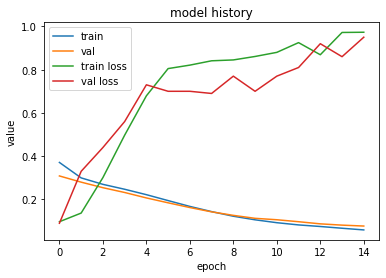

Test:
Loss: 0.07701853662729263
Accuracy: 0.949999988079071


In [42]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
hist = model.fit_generator(data,  epochs=15, verbose=1,
                           validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)
plot_hist(hist)
print('Test:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))


In [43]:
model.predict(np.array([np.zeros((50, 50, 3))]))

1/1 [==============================] - 0s 101ms/step


2022-08-15 17:18:43.521975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[4.77833347e-03, 4.34936211e-03, 8.67656589e-01, 1.20484177e-02,
        7.81856943e-03, 2.12043687e-03, 1.12782225e-04, 6.82587251e-02,
        1.47980088e-02, 8.84583406e-03, 9.21306759e-03]], dtype=float32)

In [44]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/tz/3mdp4k9x3k94jf1r3s37rps80000gn/T/tmpxqmnyw8w/assets


INFO:tensorflow:Assets written to: /var/folders/tz/3mdp4k9x3k94jf1r3s37rps80000gn/T/tmpxqmnyw8w/assets
2022-08-15 17:18:50.377451: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-08-15 17:18:50.377470: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-08-15 17:18:50.378343: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/tz/3mdp4k9x3k94jf1r3s37rps80000gn/T/tmpxqmnyw8w
2022-08-15 17:18:50.380400: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-08-15 17:18:50.380407: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/tz/3mdp4k9x3k94jf1r3s37rps80000gn/T/tmpxqmnyw8w
2022-08-15 17:18:50.386339: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-08-15 17:18:50.464748: I tensorflow/cc/saved_model/loader.cc:212] Running initialization

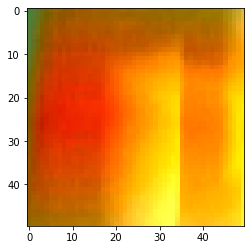

1/1 [==============================] - 0s 32ms/step
cpp_onlygo 78.20071578025818%


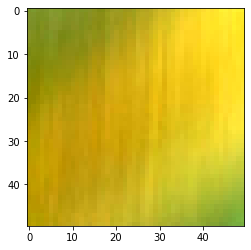

1/1 [==============================] - 0s 17ms/step
cpp_stop_line 62.23639249801636%


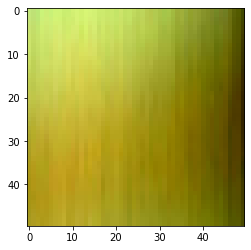

1/1 [==============================] - 0s 15ms/step
cpp_stop_line 62.01469302177429%


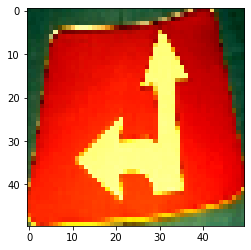

1/1 [==============================] - 0s 15ms/step
cpp_go_left 97.60192036628723%


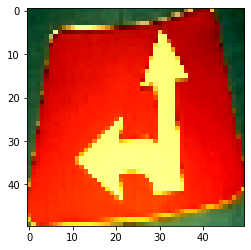

1/1 [==============================] - 0s 14ms/step
cpp_go_left 97.60192036628723%


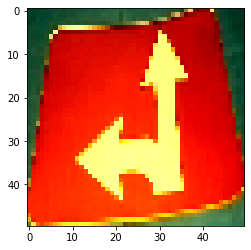

1/1 [==============================] - 0s 21ms/step
cpp_go_left 97.60192036628723%


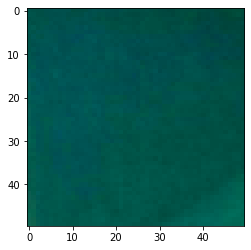

1/1 [==============================] - 0s 14ms/step
cpp_stop_line 98.52301478385925%


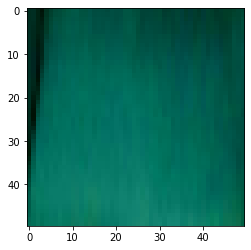

1/1 [==============================] - 0s 12ms/step
cpp_stop_line 98.52302670478821%


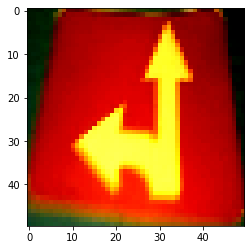

1/1 [==============================] - 0s 36ms/step
cpp_go_left 95.333993434906%


In [52]:
import cv2
from glob import glob
f_list = glob(f"./*.png")
test = []
for pic in f_list:
  img = cv2.imread(pic, cv2.IMREAD_UNCHANGED)
  img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
  test.append(np.array(img))
  plt.imshow(img)
  plt.show()
  predict = model.predict(np.array([img]))
  print(classifications[predict.argmax()], f"{predict.max() * 100}%")
  